In [2]:
pip install yellowbrick

   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 217.9 kB/s eta 0:00:02
   --------------- ---------------------- 112.6/282.6 kB 547.6 kB/s eta 0:00:01
   ------------------- ------------------ 143.4/282.6 kB 655.8 kB/s eta 0:00:01
   --------------------------- ---------- 204.8/282.6 kB 731.4 kB/s eta 0:00:01
   ------------------------------- ------ 235.5/282.6 kB 654.9 kB/s eta 0:00:01
   ---------------------------------- --- 256.0/282.6 kB 684.6 kB/s eta 0:00:01
   -------------------------------------- 282.6/282.6 kB 601.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [62]:
df=pd.read_csv("C:/Users/HP/Downloads/Alphabets_data.csv")

In [63]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [6]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [7]:
df.shape

(20000, 17)

In [8]:
df.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [9]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [11]:
df.groupby('letter').size()

letter
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
dtype: int64

array([[<Axes: title={'center': 'xbox'}>,
        <Axes: title={'center': 'ybox'}>,
        <Axes: title={'center': 'width'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'onpix'}>,
        <Axes: title={'center': 'xbar'}>,
        <Axes: title={'center': 'ybar'}>,
        <Axes: title={'center': 'x2bar'}>],
       [<Axes: title={'center': 'y2bar'}>,
        <Axes: title={'center': 'xybar'}>,
        <Axes: title={'center': 'x2ybar'}>,
        <Axes: title={'center': 'xy2bar'}>],
       [<Axes: title={'center': 'xedge'}>,
        <Axes: title={'center': 'xedgey'}>,
        <Axes: title={'center': 'yedge'}>,
        <Axes: title={'center': 'yedgex'}>]], dtype=object)

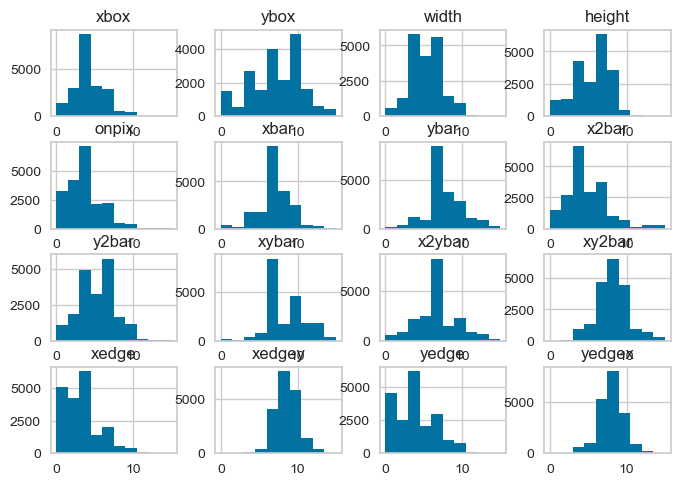

In [12]:
df.hist()

In [13]:
array=df.values

In [14]:
x=array[:,1:17]
y=array[:,0]

In [15]:
print('X matrix dimensionality:', x.shape)
print('Y vector dimensionality',y.shape)

X matrix dimensionality: (20000, 16)
Y vector dimensionality (20000,)


In [16]:
# spliting the data into traiing and testing data set
x_train,x_validation,y_train,y_validation=model_selection.train_test_split(x, y, test_size=0.20,random_state=10, stratify=y)
     

In [17]:
print("X_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_validation:",x_validation.shape)
print("y_validation:",y_validation.shape)


X_train: (16000, 16)
y_train: (16000,)
x_validation: (4000, 16)
y_validation: (4000,)


In [18]:
dec_tree=DecisionTreeClassifier()

In [19]:
cm=ConfusionMatrix(dec_tree,classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

0.8735

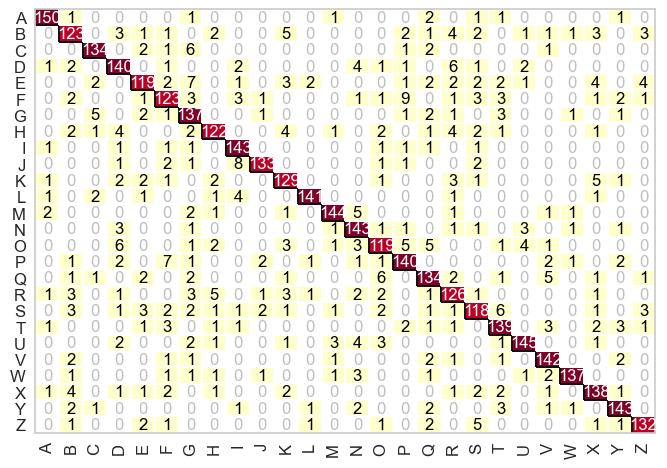

In [20]:
# train the model using training sets
cm.fit(x_train,y_train)
cm.score(x_validation,y_validation)

In [21]:
# predict the responses for test dataset
predictions=cm.predict(x_validation)

In [22]:
#acuracy of classification score
print("accuracy:", accuracy_score(y_validation,predictions))

accuracy: 0.8735


In [23]:
#compute confusion amtrix
print(confusion_matrix(y_validation,predictions))

[[150   1   0   0   0   0   1   0   0   0   0   0   1   0   0   0   2   0
    1   1   0   0   0   0   1   0]
 [  0 123   0   3   1   1   0   2   0   0   5   0   0   0   0   2   1   4
    2   0   1   1   1   3   0   3]
 [  0   0 134   0   2   1   6   0   0   0   0   0   0   0   0   1   2   0
    0   0   0   1   0   0   0   0]
 [  1   2   0 140   0   1   0   0   2   0   0   0   0   4   1   1   0   6
    1   0   2   0   0   0   0   0]
 [  0   0   2   0 119   2   7   0   1   0   3   2   0   0   0   1   2   2
    2   2   1   0   0   4   0   4]
 [  0   2   0   0   1 123   3   0   3   1   0   0   0   1   1   9   0   1
    3   3   0   0   0   1   2   1]
 [  0   0   5   0   2   1 137   0   0   1   0   0   0   0   0   1   2   1
    0   3   0   0   1   0   1   0]
 [  0   2   1   4   0   0   2 122   0   0   4   0   1   0   2   0   1   4
    2   1   0   0   0   1   0   0]
 [  1   0   0   1   0   1   1   0 143   0   0   0   0   0   1   1   1   0
    1   0   0   0   0   0   0   0]
 [  0   0   0   1  

In [24]:
# test report showin the main classification metrics
print(classification_report(y_validation,predictions,digits=5))

              precision    recall  f1-score   support

           A    0.94340   0.94937   0.94637       158
           B    0.83108   0.80392   0.81728       153
           C    0.91781   0.91156   0.91468       147
           D    0.83832   0.86957   0.85366       161
           E    0.86861   0.77273   0.81787       154
           F    0.82000   0.79355   0.80656       155
           G    0.78736   0.88387   0.83283       155
           H    0.87143   0.82993   0.85017       147
           I    0.87195   0.94702   0.90794       151
           J    0.94326   0.89262   0.91724       149
           K    0.84314   0.87162   0.85714       148
           L    0.95918   0.92763   0.94314       152
           M    0.93506   0.91139   0.92308       158
           N    0.85119   0.91083   0.88000       157
           O    0.83803   0.78808   0.81229       151
           P    0.84848   0.86957   0.85890       161
           Q    0.83750   0.85350   0.84543       157
           R    0.80769   0

In [25]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [26]:
from sklearn.naive_bayes import GaussianNB

# GaussianNB

In [27]:
gaussianNB=GaussianNB()

In [28]:
cm=ConfusionMatrix(gaussianNB, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))

0.64175

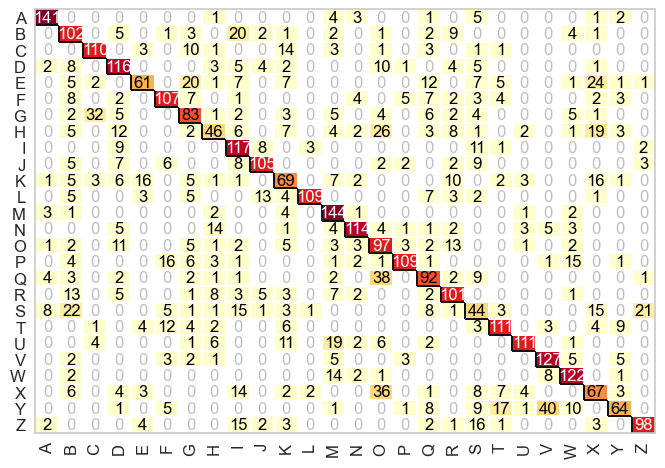

In [29]:
cm.fit(x_train,y_train)
cm.score(x_validation,y_validation)

In [30]:
# predict the responses for test dataset
predictions=cm.predict(x_validation)

In [31]:
#accuracy classification score
print("accuracy:", accuracy_score(y_validation,predictions))

accuracy: 0.64175


In [32]:
#compute confusion matrix
print(confusion_matrix(y_validation,predictions))

[[141   0   0   0   0   0   0   1   0   0   0   0   4   3   0   0   1   0
    5   0   0   0   0   1   2   0]
 [  0 102   0   5   0   1   3   0  20   2   1   0   2   0   1   0   2   9
    0   0   0   0   4   1   0   0]
 [  0   0 110   0   3   0  10   1   0   0  14   0   3   0   1   0   3   0
    1   1   0   0   0   0   0   0]
 [  2   8   0 116   0   0   0   3   5   4   2   0   0   0  10   1   0   4
    5   0   0   0   0   1   0   0]
 [  0   5   2   0  61   0  20   1   7   0   7   0   0   0   0   0  12   0
    7   5   0   0   1  24   1   1]
 [  0   8   0   2   0 107   7   0   1   0   0   0   0   4   0   5   7   2
    3   4   0   0   0   2   3   0]
 [  0   2  32   5   0   0  83   1   2   0   3   0   5   0   4   0   6   2
    4   0   0   0   5   1   0   0]
 [  0   5   0  12   0   0   2  46   6   0   7   0   4   2  26   0   3   8
    1   0   2   0   1  19   3   0]
 [  0   0   0   9   0   0   0   0 117   8   0   3   0   0   0   0   0   0
   11   1   0   0   0   0   0   2]
 [  0   5   0   7  

In [33]:
# text report showin the main classifications metrics
print(classification_report(y_validation,predictions,digits=5))

              precision    recall  f1-score   support

           A    0.87037   0.89241   0.88125       158
           B    0.51000   0.66667   0.57790       153
           C    0.72368   0.74830   0.73579       147
           D    0.61053   0.72050   0.66097       161
           E    0.64894   0.39610   0.49194       154
           F    0.69032   0.69032   0.69032       155
           G    0.52866   0.53548   0.53205       155
           H    0.49462   0.31293   0.38333       147
           I    0.53670   0.77483   0.63415       151
           J    0.75000   0.70470   0.72664       149
           K    0.47586   0.46622   0.47099       148
           L    0.94783   0.71711   0.81648       152
           M    0.64000   0.91139   0.75196       158
           N    0.83212   0.72611   0.77551       157
           O    0.42731   0.64238   0.51323       151
           P    0.87200   0.67702   0.76224       161
           Q    0.57500   0.58599   0.58044       157
           R    0.63125   0

In [34]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

# KNN classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier


In [36]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', algorithm='auto', weights='distance', n_jobs=-1)


In [37]:
cm = ConfusionMatrix(knn, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))


0.965

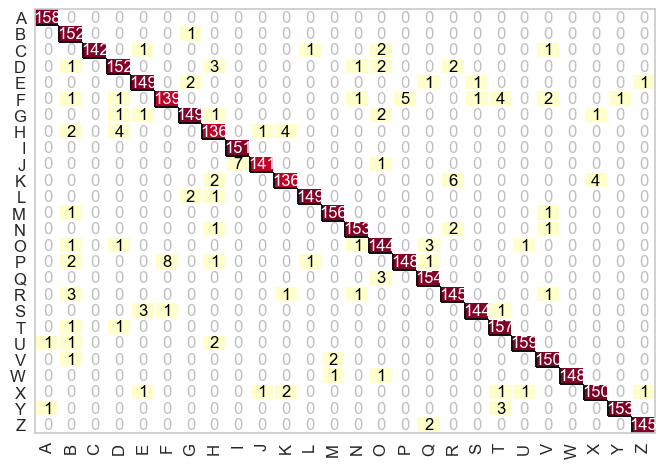

In [38]:
# train the model using the trainin sets
cm.fit(x_train,y_train)
cm.score(x_validation,y_validation)

In [39]:
#predict the responses for test dataset
predictions=cm.predict(x_validation)

In [40]:
#accuracy classifications score
print("Accuracy:", accuracy_score(y_validation,predictions))

Accuracy: 0.965


In [41]:
#compute confusion matrix
print(confusion_matrix(y_validation,predictions))

[[158   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 152   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0 142   0   1   0   0   0   0   0   0   1   0   0   2   0   0   0
    0   0   0   1   0   0   0   0]
 [  0   1   0 152   0   0   0   3   0   0   0   0   0   1   2   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 149   0   2   0   0   0   0   0   0   0   0   0   1   0
    1   0   0   0   0   0   0   1]
 [  0   1   0   1   0 139   0   0   0   0   0   0   0   1   0   5   0   0
    1   4   0   2   0   0   1   0]
 [  0   0   0   1   1   0 149   1   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0   1   0   0]
 [  0   2   0   4   0   0   0 136   0   1   4   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 151   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [42]:
#text reporting showing the main classification matrics
print(classification_report(y_validation,predictions,digits=5))

              precision    recall  f1-score   support

           A    0.98750   1.00000   0.99371       158
           B    0.91566   0.99346   0.95298       153
           C    1.00000   0.96599   0.98270       147
           D    0.95000   0.94410   0.94704       161
           E    0.96129   0.96753   0.96440       154
           F    0.93919   0.89677   0.91749       155
           G    0.96753   0.96129   0.96440       155
           H    0.92517   0.92517   0.92517       147
           I    0.95570   1.00000   0.97735       151
           J    0.98601   0.94631   0.96575       149
           K    0.95105   0.91892   0.93471       148
           L    0.98675   0.98026   0.98350       152
           M    0.98113   0.98734   0.98423       158
           N    0.97452   0.97452   0.97452       157
           O    0.92903   0.95364   0.94118       151
           P    0.96732   0.91925   0.94268       161
           Q    0.95652   0.98089   0.96855       157
           R    0.93548   0

In [43]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

# SVC


In [44]:
from sklearn.svm import SVC

In [45]:
svc=SVC(kernel='rbf',gamma='auto',C=6)

In [46]:
cm = ConfusionMatrix(svc, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))


0.978

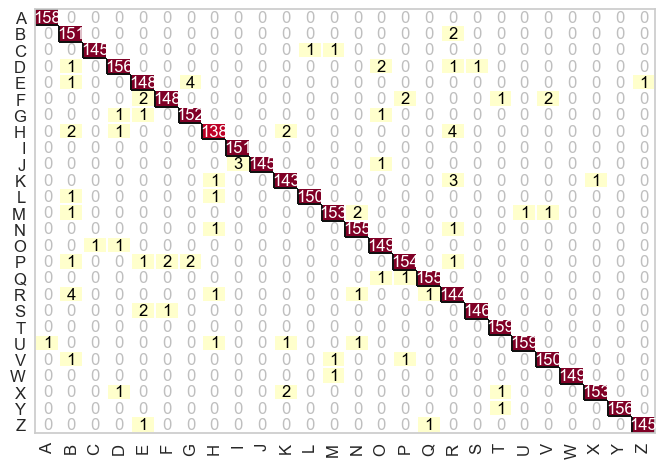

In [47]:
cm.fit(x_train,y_train)
cm.score(x_validation,y_validation)

In [48]:
#predict the responses for the dataset
predictions=cm.predict(x_validation)

In [49]:
#accuracy classification score
print("Accuracy:", accuracy_score(y_validation, predictions))

Accuracy: 0.978


In [50]:
#compute the confusion matrix
print(confusion_matrix(y_validation,predictions))

[[158   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 151   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0 145   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 156   0   0   0   0   0   0   0   0   0   0   2   0   0   1
    1   0   0   0   0   0   0   0]
 [  0   1   0   0 148   0   4   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   2 148   0   0   0   0   0   0   0   0   0   2   0   0
    0   1   0   2   0   0   0   0]
 [  0   0   0   1   1   0 152   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   2   0   1   0   0   0 138   0   0   2   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 151   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [51]:
# text report showing the main classification metrics
print(classification_report(y_validation,predictions,digits=5))

              precision    recall  f1-score   support

           A    0.99371   1.00000   0.99685       158
           B    0.92638   0.98693   0.95570       153
           C    0.99315   0.98639   0.98976       147
           D    0.97500   0.96894   0.97196       161
           E    0.95484   0.96104   0.95793       154
           F    0.98013   0.95484   0.96732       155
           G    0.96203   0.98065   0.97125       155
           H    0.96503   0.93878   0.95172       147
           I    0.98052   1.00000   0.99016       151
           J    1.00000   0.97315   0.98639       149
           K    0.96622   0.96622   0.96622       148
           L    0.99338   0.98684   0.99010       152
           M    0.98077   0.96835   0.97452       158
           N    0.97484   0.98726   0.98101       157
           O    0.96753   0.98675   0.97705       151
           P    0.97468   0.95652   0.96552       161
           Q    0.98726   0.98726   0.98726       157
           R    0.92308   0

In [52]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

# ANN

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [54]:
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [55]:
StandardScaler()

StandardScaler()

In [56]:
x_train=scaler.transform(x_train)
x_validation=scaler.transform(x_validation)

In [57]:
mlp=MLPClassifier(hidden_layer_sizes=(250, 300), max_iter=1000000, activation='logistic')


In [58]:
cm = ConfusionMatrix(mlp, classes="A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z".split(','))


0.964

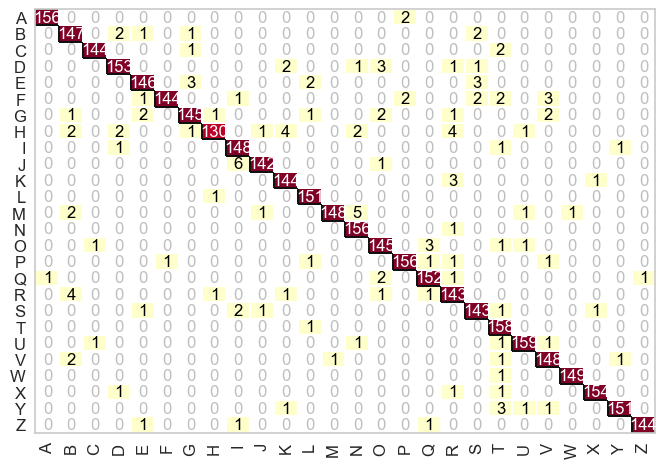

In [59]:
#train h model using the trainin sets
cm.fit(x_train, y_train)
cm.score(x_validation, y_validation)

In [60]:
#accuracy confusion amtrix
print(confusion_matrix(y_validation, predictions))

[[158   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 151   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [  0   0 145   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 156   0   0   0   0   0   0   0   0   0   0   2   0   0   1
    1   0   0   0   0   0   0   0]
 [  0   1   0   0 148   0   4   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   0   2 148   0   0   0   0   0   0   0   0   0   2   0   0
    0   1   0   2   0   0   0   0]
 [  0   0   0   1   1   0 152   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   2   0   1   0   0   0 138   0   0   2   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 151   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0  

In [64]:
cm.poof()

<Figure size 800x550 with 0 Axes>

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>